**ImageDataGenerator** > It has been used for data augmentation. This is done by transforming and modifying the training dataset in various ways to extract more patterns and increase the generalization ability of the model. In this case, the rescale parameter is used to scale the pixel values of the images between 0 and 1. the shear_range and zoom_range parameters are used to rotate and scale the images at various angles and magnification/scaling levels. the horizontal_flip parameter is used to flip the images horizontally symmetrically. Using these methods helps the model to adapt to a wider range of data and perform better.

**Sequential** > Sequential model is commonly used in CNN classification for its simplicity in defining a linear stack of layers.

**Conv2D, AveragePooling2D, MaxPooling2D, Flatten, Dense** > 

Conv2D: Convolutional layer for feature extraction from input images.

AveragePooling2D: Pooling layer to downsample feature maps by averaging values.

MaxPooling2D: Pooling layer to downsample feature maps by taking maximum values.

Flatten: Layer to flatten the multi-dimensional output of previous layers into a 1D vector.

Dense: Fully connected layer to perform classification based on features extracted by convolutional layers.

**classification_report** > Importing classification_report from scikit-learn metrics module for generating a text report showing the main classification metrics.

**Javascript, Image** > Importing display, Javascript, and Image from IPython.display module for displaying interactive content and images in Collab Notebook environment.

**b64decode** > # Importing b64decode function from base64 module to decode Base64 encoded data.





**Numpy** > Importing numpy library for numerical array manipulation and mathematical operations.

**Matplotlib** > Importing matplotlib.pyplot from matplotlib library for data visualization and plotting.

**cv2** > Importing cv2 library for computer vision tasks such as image processing, computer vision algorithms, and machine learning in OpenCV (Open Source Computer Vision Library).

**os** > Importing os module for interacting with the operating system, performing file operations, and accessing environment variables.

**zipfile** > Importing zipfile module for handling zip archives, extracting files, and compressing files and directories.

**warnings** > Importing warnings module for managing warnings during runtime.




In [1]:
# Installing the necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, MaxPooling2D, Flatten, Dense

from sklearn.metrics import classification_report

from IPython.display import display, Javascript, Image
from base64 import b64decode

# If you work on Collab, import the following:
#from google.colab.output import eval_js

import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import zipfile
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Check the GPU
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU device not found')
else:
    print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
# Extract the contents of the zip file. If you did this part manually, do not run this cell, no need.
with zipfile.ZipFile('/content/pins-face-recognition.zip', 'r') as zip_ref:
    zip_ref.extractall('data_directory')

In [3]:
# Define the directory path where the dataset is stored and list all the folders (classes) in that directory.
PATH = "<PATH_TO_DATAASET>\\105_classes_pins_dataset"
data_directory = PATH
folders = os.listdir(data_directory)

In [5]:
# Check if the path is correct. You should see list of "pins_*"
folders[:5]

['pins_Adriana Lima',
 'pins_Alex Lawther',
 'pins_Alexandra Daddario',
 'pins_Alvaro Morte',
 'pins_alycia dabnem carey']

In [6]:
# Create X and Y
X, Y = [], []

In [7]:
for category in folders:
    # Join the category folder path with the main data directory path
    path = os.path.join(data_directory, category)

    # Iterate over each image in the category folder
    for img in os.listdir(path):

        # Join the image path with the category folder path
        img_path = os.path.join(path, img)

        # Append the image path to the list of X (input data)
        X.append(img_path)

        # Append the category name (without the 'pins_' prefix) to the list of Y (labels)
        Y.append(category[5:])

In [8]:
# Split the dataset into training and testing sets using train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.07, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size=0.08, random_state=42)

In [9]:
# Check the length of the variables
print(len(x_train))
print(len(x_test))
print(len(x_val))

15001
1228
1305


In [10]:
import pandas as pd
# Create DataFrames for training, testing, and validation data
train_Df = pd.DataFrame({'FileName': x_train, 'Category': y_train})
test_Df = pd.DataFrame({'FileName': x_test, 'Category': y_test})
val_Df = pd.DataFrame({'FileName': x_val, 'Category': y_val})

In [11]:
height, width = 160, 160 # Image height and width
batchSize = 128 # Batch size for training
numClasses = len(folders) # Number of classes (outputs)
epochsNum = 60 # Number of epochs for training

# Creating data generators for training, testing, and validation
# Rescale pixel values for testing and validation
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=False)
test_datagen = ImageDataGenerator(rescale=1./255)

# Creating iterators (tuples of (x, y)) for training, testing, and validation data
train = train_datagen.flow_from_dataframe(train_Df, x_col='FileName', y_col='Category',
                                         target_size=(height, width),
                                         batch_size=batchSize, class_mode='categorical')
test = test_datagen.flow_from_dataframe(test_Df, x_col='FileName', y_col='Category',
                                         target_size=(height, width),
                                         batch_size=batchSize, class_mode='categorical')
validation = test_datagen.flow_from_dataframe(val_Df, x_col='FileName', y_col='Category',
                                         target_size=(height, width),
                                         batch_size=batchSize, class_mode='categorical')

# Get the categories (class labels) from the training data
categories = [x for x in train.class_indices]

Found 15001 validated image filenames belonging to 105 classes.
Found 1228 validated image filenames belonging to 105 classes.
Found 1305 validated image filenames belonging to 105 classes.


In [12]:
# See the first 10 classes
categories[:10]

['Adriana Lima',
 'Alex Lawther',
 'Alexandra Daddario',
 'Alvaro Morte',
 'Amanda Crew',
 'Andy Samberg',
 'Anne Hathaway',
 'Anthony Mackie',
 'Avril Lavigne',
 'Ben Affleck']

In [21]:
model = Sequential() # Create a Sequential model

# Add convolutional layers with specified filters, kernel size, and activation function
# Input shapes is used only for the first layer
model.add(Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[height, width, 3]))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
# Pooling helps the neural network extract important features from the input while simultaneously reducing the dimensions of the data.
model.add(MaxPooling2D(pool_size=3, strides=2))


model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=3, strides=2))


model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=3, strides=2))


model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=3, strides=2))


model.add(Conv2D(filters=1024, kernel_size=2, activation='relu'))
model.add(AveragePooling2D(pool_size=2, strides=1))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Add a fully connected layer with 128 units and tanh activation
model.add(Dense(units=128, activation='tanh'))

# Add an output layer with softmax activation for classification
model.add(Dense(units=numClasses, activation='softmax'))

In [26]:
# To save checkpoints, we need to create a folder. Later, we will use this folder to pull the weights that we also saved.
PATH_WEIGHTS = "model"
save_dir = PATH_WEIGHTS
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

In [23]:
################################################################################
# After the first model training, you can record the weights with the highest 
# accuracy by looking at the validation graph. In this sample, lets select '01-4.64.weights.h5' 
# You can use this weights later, without building the model again.

# To load weights, create the same model architecture and use the following load_weights function
# As a parameter, you must give the path where you save the model's weights.

#model.load_weights(f"{PATH_WEIGHTS}\\01-4.64.weights.h5")
################################################################################

In [ ]:
# Define a ModelCheckpoint callback to save model weights at each epoch
# You can specify the directory where you want to save the model weights. Now the path is 'model\<epoch-vallos.weights.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=PATH_WEIGHTS + '/{epoch:02d}-{val_loss:.2f}.weights.h5',
                                               monitor='val_loss', save_best_only=False, save_weights_only=True)

# Compile the model with Adamax optimizer, categorical cross-entropy loss function, and accuracy metric
model.compile(optimizer='Adamax', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using the training data, validate using the validation data,
# and save weights at each epoch using the ModelCheckpoint callback
model.fit(x=train, validation_data=validation, epochs=epochsNum, shuffle=True, callbacks=[checkpoint])

In [ ]:
# After training the model, retrieve the training and validation accuracy
history = model.history.history
train_accuracy = history['accuracy']
val_accuracy = history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

# Create a plot for training and validation accuracy
plt.figure(figsize=(15, 7.5), dpi=200)
plt.plot(epochs, train_accuracy, 'o-', color='#A79B98', label='Train Accuracy')
plt.plot(epochs, val_accuracy, 'h-', color='#391E18', label='Validation Accuracy')
plt.title('Train Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
# After training the model, retrieve the training and validation loss
train_loss = history['loss']
val_loss = history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Create a plot for training and validation loss
plt.figure(figsize=(10, 5), dpi=200)
plt.plot(epochs, train_loss, 'o-', color='#A79B98', label='Train Loss')
plt.plot(epochs, val_loss, 'h-', color='#391E18', label='Validation Loss')
plt.title('Train Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [24]:
# Initialize lists to store predictions, images, and labels
prediction, img, label = [], [], []

# Iterate over the test data
for i in range(len(test)):
    img.extend(test[i][0])
    prediction.extend(model.predict(test[i][0], verbose=0))
    label.extend(test[i][1])

# Convert lists to numpy arrays
else:
    prediction, label = np.array(prediction, dtype='float32'), np.array(label, dtype='float32')

    # Get predicted classes and actual classes
    test_pred_classes = np.argmax(prediction, axis=1)
    test_actual_classes = [np.argmax(x) for x in label]

In [ ]:
# Generate classification report
clf_report = classification_report(test_actual_classes, test_pred_classes)
print(f'Classification Report:\n{clf_report}')

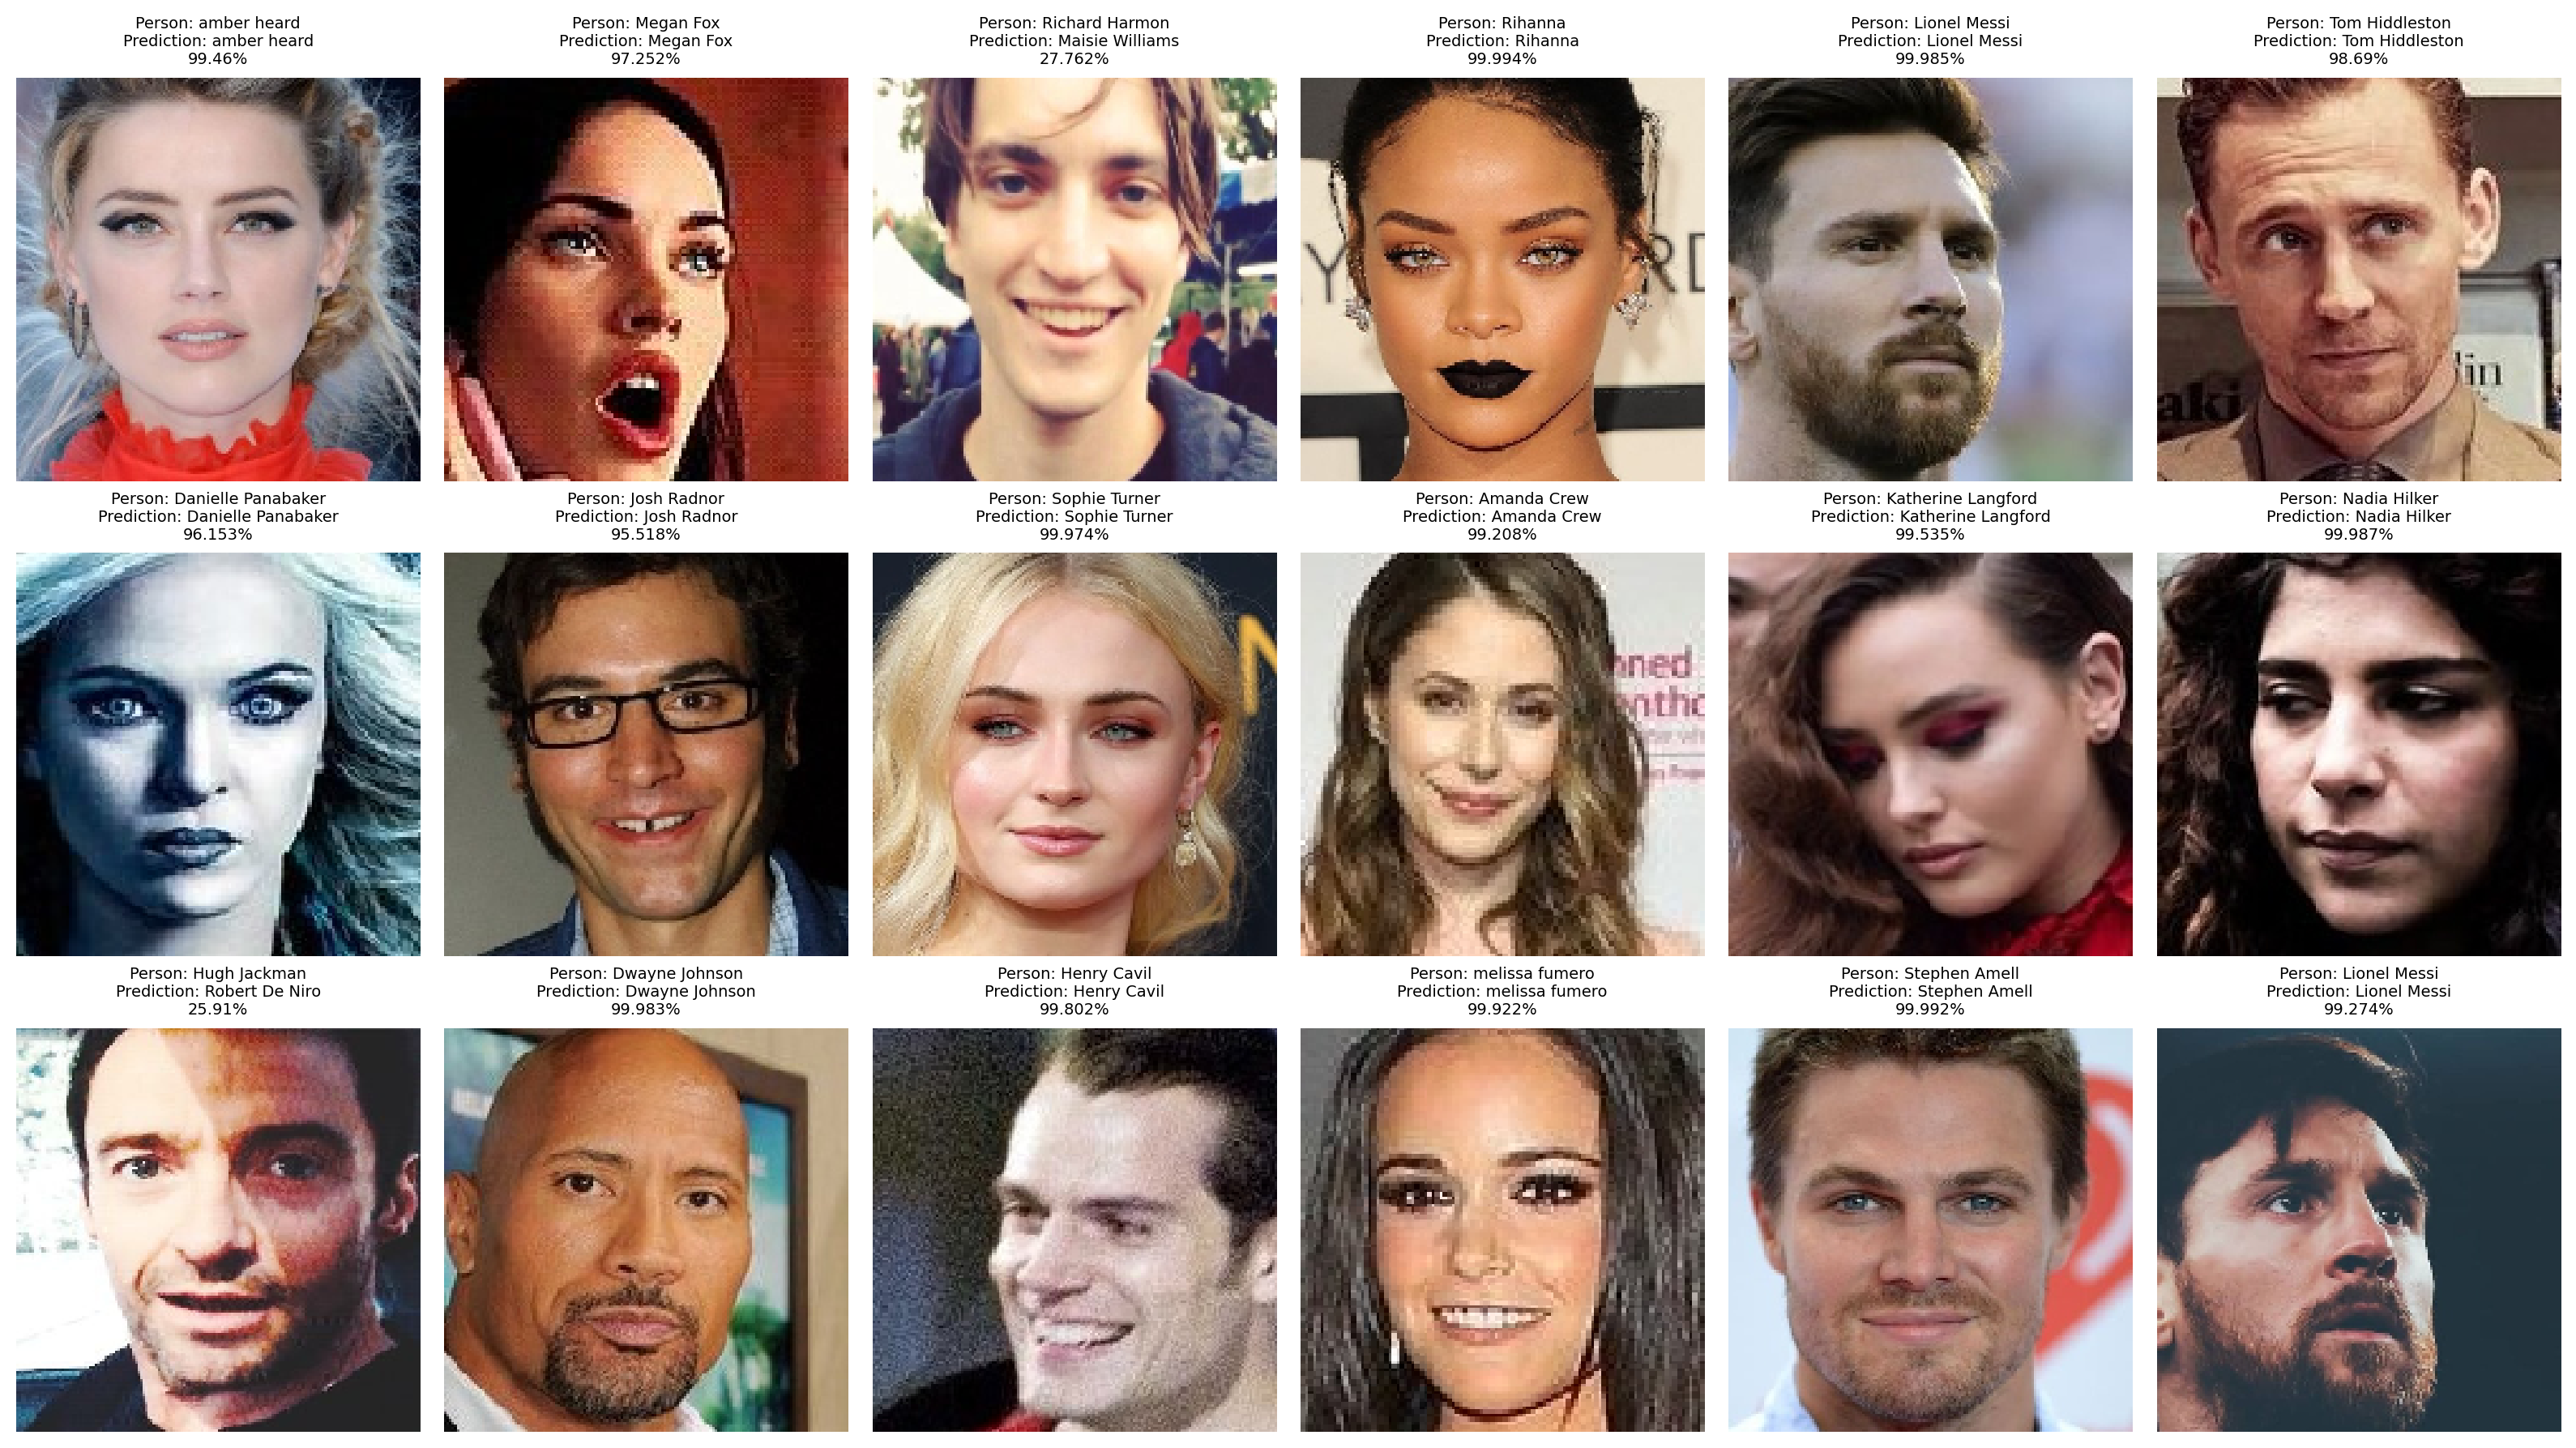

In [14]:
# Display the first 16 images along with their predictions and true labels
plt.figure(figsize=[16, 12], dpi=200)
for i in range(18):
    plt.subplot(4, 6, i+1)
    plt.imshow(img[i])  # Display the image
    plt.axis('off')  # Turn of axis
    plt.title(
        f"Person: {categories[test_actual_classes[i]]}\n"
        f"Prediction: {categories[test_pred_classes[i]]}\n"
        f"{round(100 * np.max(prediction[i]), 3)}%",
        fontsize=7
    )

plt.tight_layout()
plt.show()


IF YOU WANT TO PREDICT IMAGE WITHOUT CROPPING, USE THE FOLLOWING CODE. AFTER THE PREDICT, OPENCV WILL DETECT THE FACES BUT WILL NOT USE IT IN PREDICTON. IF YOU DO NOT WANT TO USE THIS FUNCTION, USE THE NEXT FUNCTION AFTER THIS ONE

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the output to fit the video element.
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Wait for Capture to be clicked.
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Taking an image from the camera and predict
try:
    filename = take_photo()
    print('Saved to {}'.format(filename))

    # Upload the image and adapt it to the model
    img = cv2.imread(filename)
    img_for_display = np.copy(img)  # Create a separate copy to draw the square
    img = cv2.resize(img, (width, height))  # Resizing according to the input size of the model
    img = img / 255.0  # Normalization
    img = np.expand_dims(img, axis=0)  # Input format expected by the model

    # OpenCV face detector
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Convert image to gray
    gray_img = cv2.cvtColor(img_for_display, cv2.COLOR_BGR2GRAY)

    # Detect the faces
    faces = face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5)

    # For each faces
    for (x, y, w, h) in faces:
        # Square the face
        cv2.rectangle(img_for_display, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Show the squared face
    display(Image(data=cv2.imencode('.jpg', img_for_display)[1].tobytes()))

    # Prediction
    prediction = model.predict(img)
    predicted_class_index = np.argmax(prediction, axis=1)[0]
    predicted_class_name = categories[predicted_class_index]
    prediction_confidence = 100 * np.max(prediction)

    print(f"Tahmin Edilen Sınıf: {predicted_class_name}")
    print(f"Özgüven: {prediction_confidence:.2f}%")

except Exception as err:
    print(str(err))



IF YOU WANT TO GIVE THE MODEL A CROPPED IMAGE, USE THE CODE BELOW. THIS WAY IS MORE RELIABLE, BUT IN SOME CASES OPENCV CAN DETECT MORE THAN ONE FACE. THIS MAY CAUSE THE MODEL TO MAKE MULTIPLE PREDICTIONS WHEN IT SHOULD MAKE ONE PREDICTION.

<IPython.core.display.Javascript object>

Saved to photo.jpg
1/1 [==============================] - 0s 18ms/step


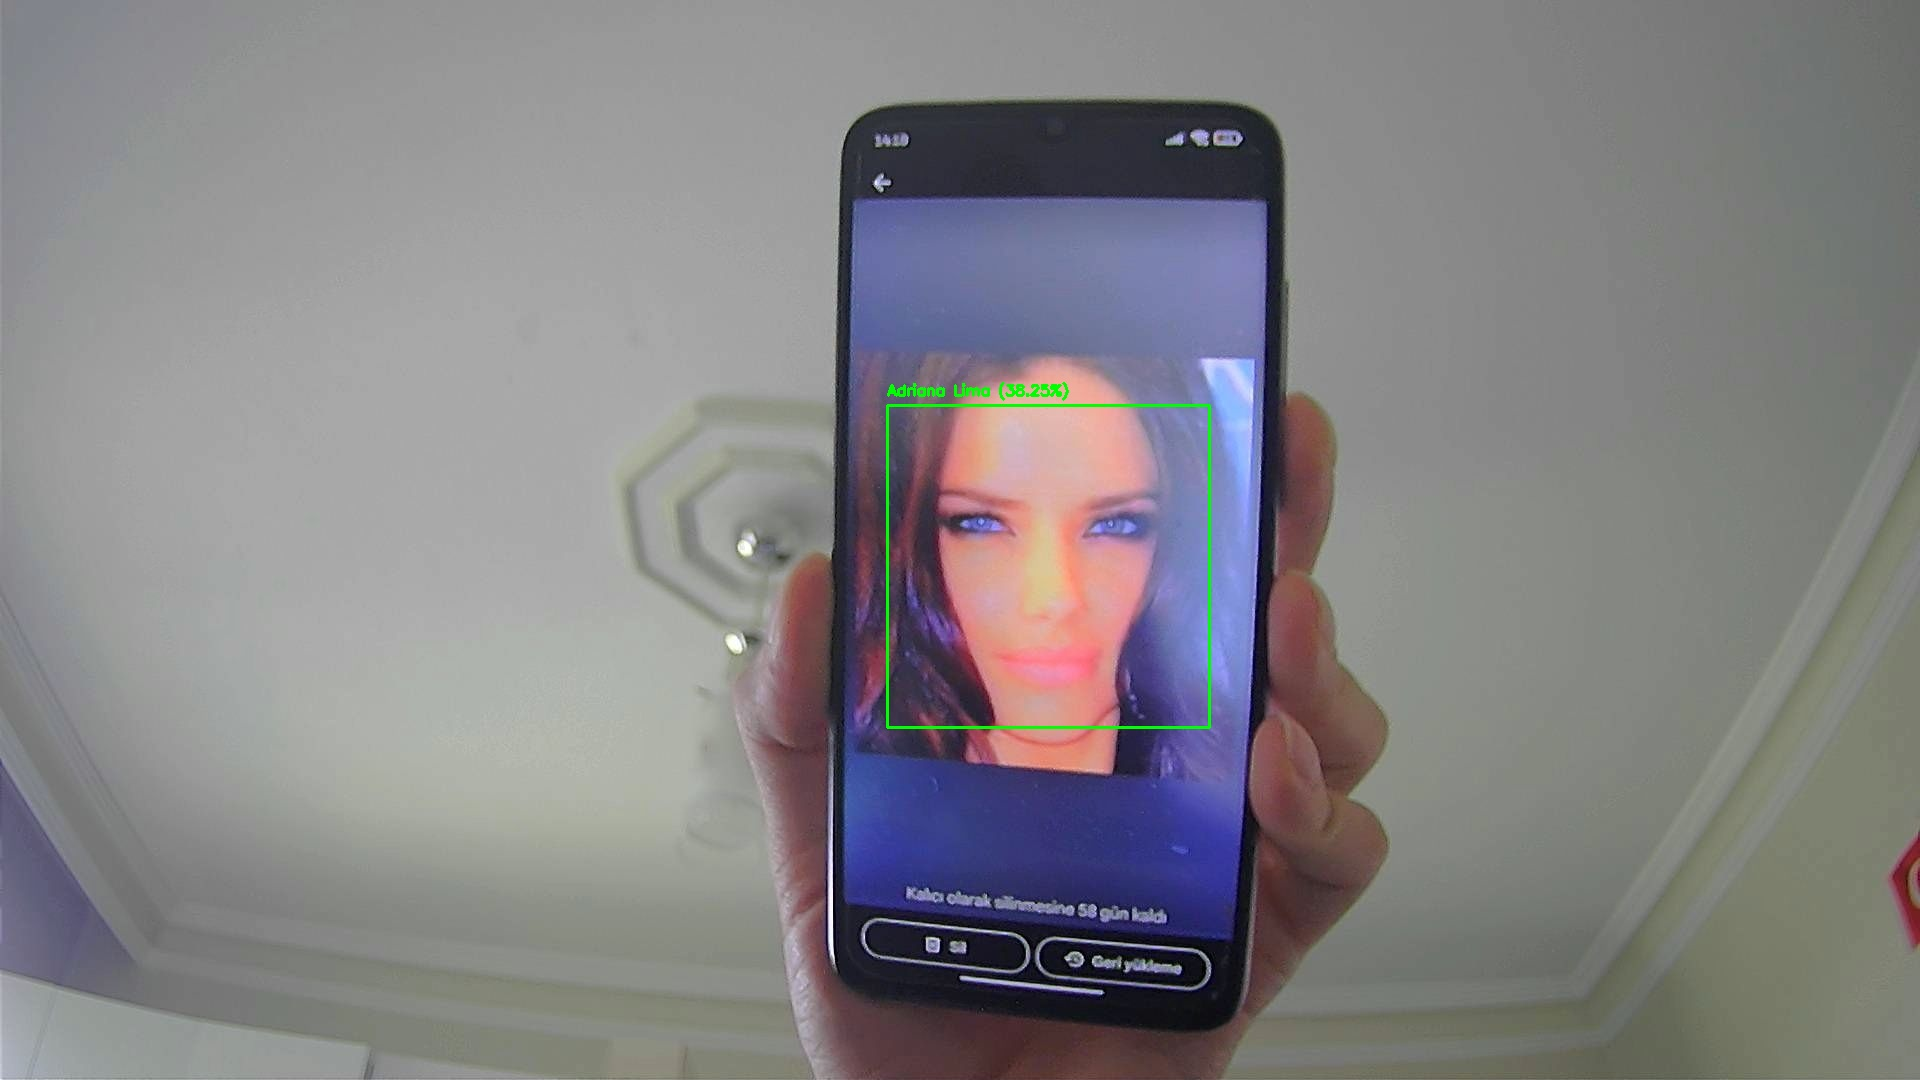

In [65]:
# Capture image from the camera and make predictions using the model
try:
    filename = take_photo()
    print('Saved to {}'.format(filename))

    # Load the image and prepare it for the model
    img = cv2.imread(filename)
    img_for_display = np.copy(img)  # Create a separate copy for drawing the rectangle

    # Load the Haar cascade classifier for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Convert the image to grayscale for face detection
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale image
    faces = face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5)

    # For each detected face
    for (x, y, w, h) in faces:
        # Extract the face region from the image
        face_img = img[y:y+h, x:x+w]

        # Resize the face image to match the model's input size
        face_img = cv2.resize(face_img, (width, height))

        # Normalize the face image
        face_img = face_img / 255.0

        # Convert the face image to the expected input format of the model
        face_img = np.expand_dims(face_img, axis=0)

        # Make predictions using the model
        prediction = model.predict(face_img)
        predicted_class_index = np.argmax(prediction, axis=1)[0]
        predicted_class_name = categories[predicted_class_index]
        prediction_confidence = 100 * np.max(prediction)

        # Draw a rectangle around the detected face on the original image
        cv2.rectangle(img_for_display, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Display the predicted class and confidence on the original image
        cv2.putText(img_for_display, f"{predicted_class_name} ({prediction_confidence:.2f}%)", (x, y-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Display the original image with detected faces and predictions
    display(Image(data=cv2.imencode('.jpg', img_for_display)[1].tobytes()))

except Exception as err:
    print(str(err))


YOU CAN USE THE FOLLOWING WAY TO RUN THE CAMERA LOCALLY

In [ ]:
# Get the cropped face image for the model to predict
def get_cropped_face_image(image, face_coordinates):
    x, y, w, h = face_coordinates
    face_image = image[y:y+h, x:x+w]  # Yüz bölgesini kırp
    return face_image

# Get the cropped face image for the model to predict
def preprocess_face_image(face_image, target_size=(160, 160)):
    face_image = cv2.resize(face_image, target_size)  # Boyutları yeniden boyutlandır
    face_image = face_image / 255.0  # Normalizasyon
    face_image = np.expand_dims(face_image, axis=0)  # Boyut eklemek
    return face_image

# Model prediction
def predict_with_model(face_image):
    prediction = model.predict(face_image)
    predicted_class_index = np.argmax(prediction, axis=1)[0]
    predicted_class_name = categories[predicted_class_index]
    prediction_confidence = 100 * np.max(prediction)
    return predicted_class_name, prediction_confidence

# Use OpenCV for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Start camera
cap = cv2.VideoCapture(0)

while True:
    # Capture image from camera
    ret, frame = cap.read()

    # Grayscale the image
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect the faces
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5)

    # For each detected face
    for (x, y, w, h) in faces:
        # Crop the face area
        face_image = get_cropped_face_image(frame, (x, y, w, h))

        # Adapt the face image to the input size of the model
        processed_face_image = preprocess_face_image(face_image)

        # Make predictions using the model
        predicted_class, confidence = predict_with_model(processed_face_image)

        # Frame the face and print prediction and confidence on the image
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame, f"{predicted_class} ({confidence:.2f}%)", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Show image
    cv2.imshow('Face Recognition', frame)

    # Press 't' key to quit
    if cv2.waitKey(1) & 0xFF == ord('t'):
        break

# Close the camera
cap.release()
cv2.destroyAllWindows()